# This notebook file is used aligning fitbit for the PA protocol

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
from matplotlib import pyplot as plt

## The block of code below reads in the fitbit-hr and fitabase. Then it plots them
<p>Please be sure to change the first line of code in the block below. You should change the participant number to the current participant that you are trying to process. For example the end of the line may read something like '\\2989\\'. If you wanted to process participant 3000 you would change the 2989 to 3000.</p>

In [3]:
path = "V:\\ACOI\\R01 - W4K\\1_Sleep Study\\1_Participant Data\\7517083023\\"
part_id = path[-11:-1]
# Read in tracking sheet to obtain protocol date
tracking_sheet = pd.read_excel("V:\\ACOI\\R01 - W4K\\1_Sleep Study\\Sleep study tracking.xlsx").dropna(how='all')
times = tracking_sheet.loc[tracking_sheet['Child ID'] == int(part_id), ['Date of Visit', 'Devices time on', 'Devices time off']].iloc[0]
start = datetime.combine(times.iloc[0], times.iloc[1])
end = datetime.combine(times.iloc[0] + timedelta(days=1), times.iloc[2])
print(f"Protocol Start: {start} \nProtocol End: {end}")



Protocol Start: 2023-08-30 22:30:00 
Protocol End: 2023-08-31 04:30:00


In [4]:
# Read in FITBIT data
slog_hr = pd.read_csv(path + "Fitbit\\" + part_id + "_heart.csv", parse_dates=['Time'], infer_datetime_format=True)
# Read in FITABASE data
fitabase = pd.read_csv(path + "Fitbit\\Fitabase\\" + part_id + "_hr.csv", parse_dates=['Time'])




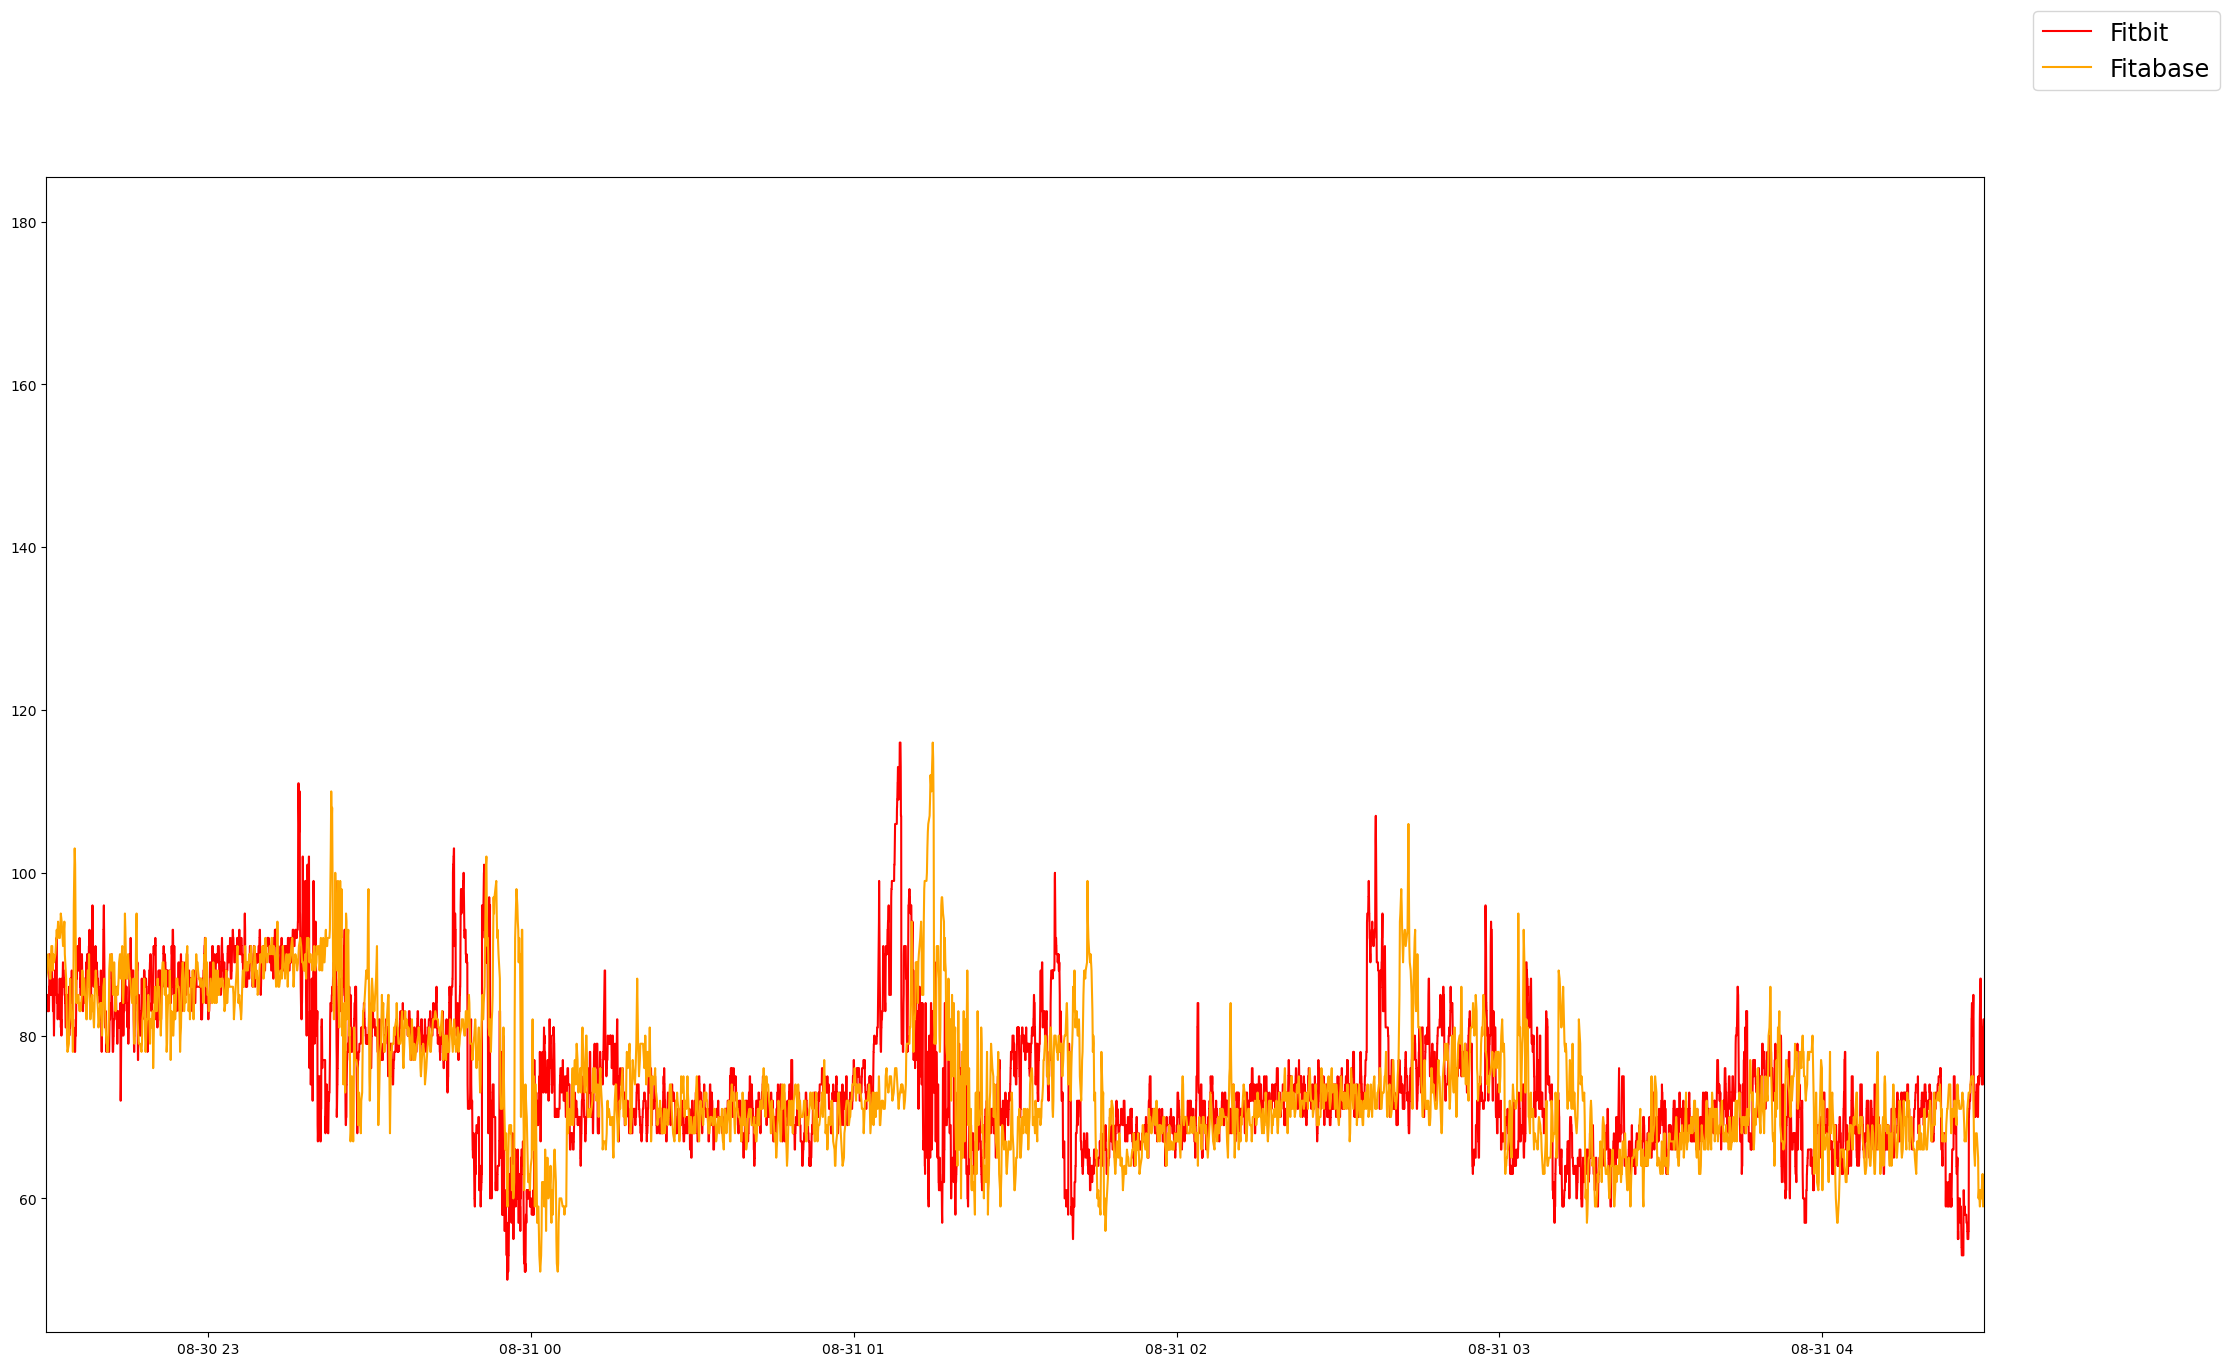

In [5]:

#slog_hr['Time'] = slog_hr['Time'].apply(lambda x: x + timedelta(minutes=12))
# Plot HR to check initial alignment
#df1=slog_hr.loc[(slog_hr['Time'] >= start+timedelta(hours=0,minutes=10)) & (slog_hr['Time'] <= start+timedelta(hours=4,minutes=40)), :].reset_index(drop=True)
#df2=slog_hr.loc[(fitabse['Time'] >= start+timedelta(hours=2,minutes=44)) & (slog_hr['Time'] <= end), :].reset_index(drop=True)
fig, ax = plt.subplots(figsize=[25,15])
#df1=df1['Time'].apply(lambda x: x + timedelta(hours=2,minutes=40))
ax.plot(slog_hr['Time'], slog_hr['Heart Rate'], label='Fitbit', color='red')
ax.plot(fitabase['Time'], fitabase['Value'], label='Fitabase', color='orange')
ax.set(xlim=[start, end])
#ax.set(xlim=[start, start + timedelta(hours=2)])
fig.legend(fontsize='xx-large')
plt.show()

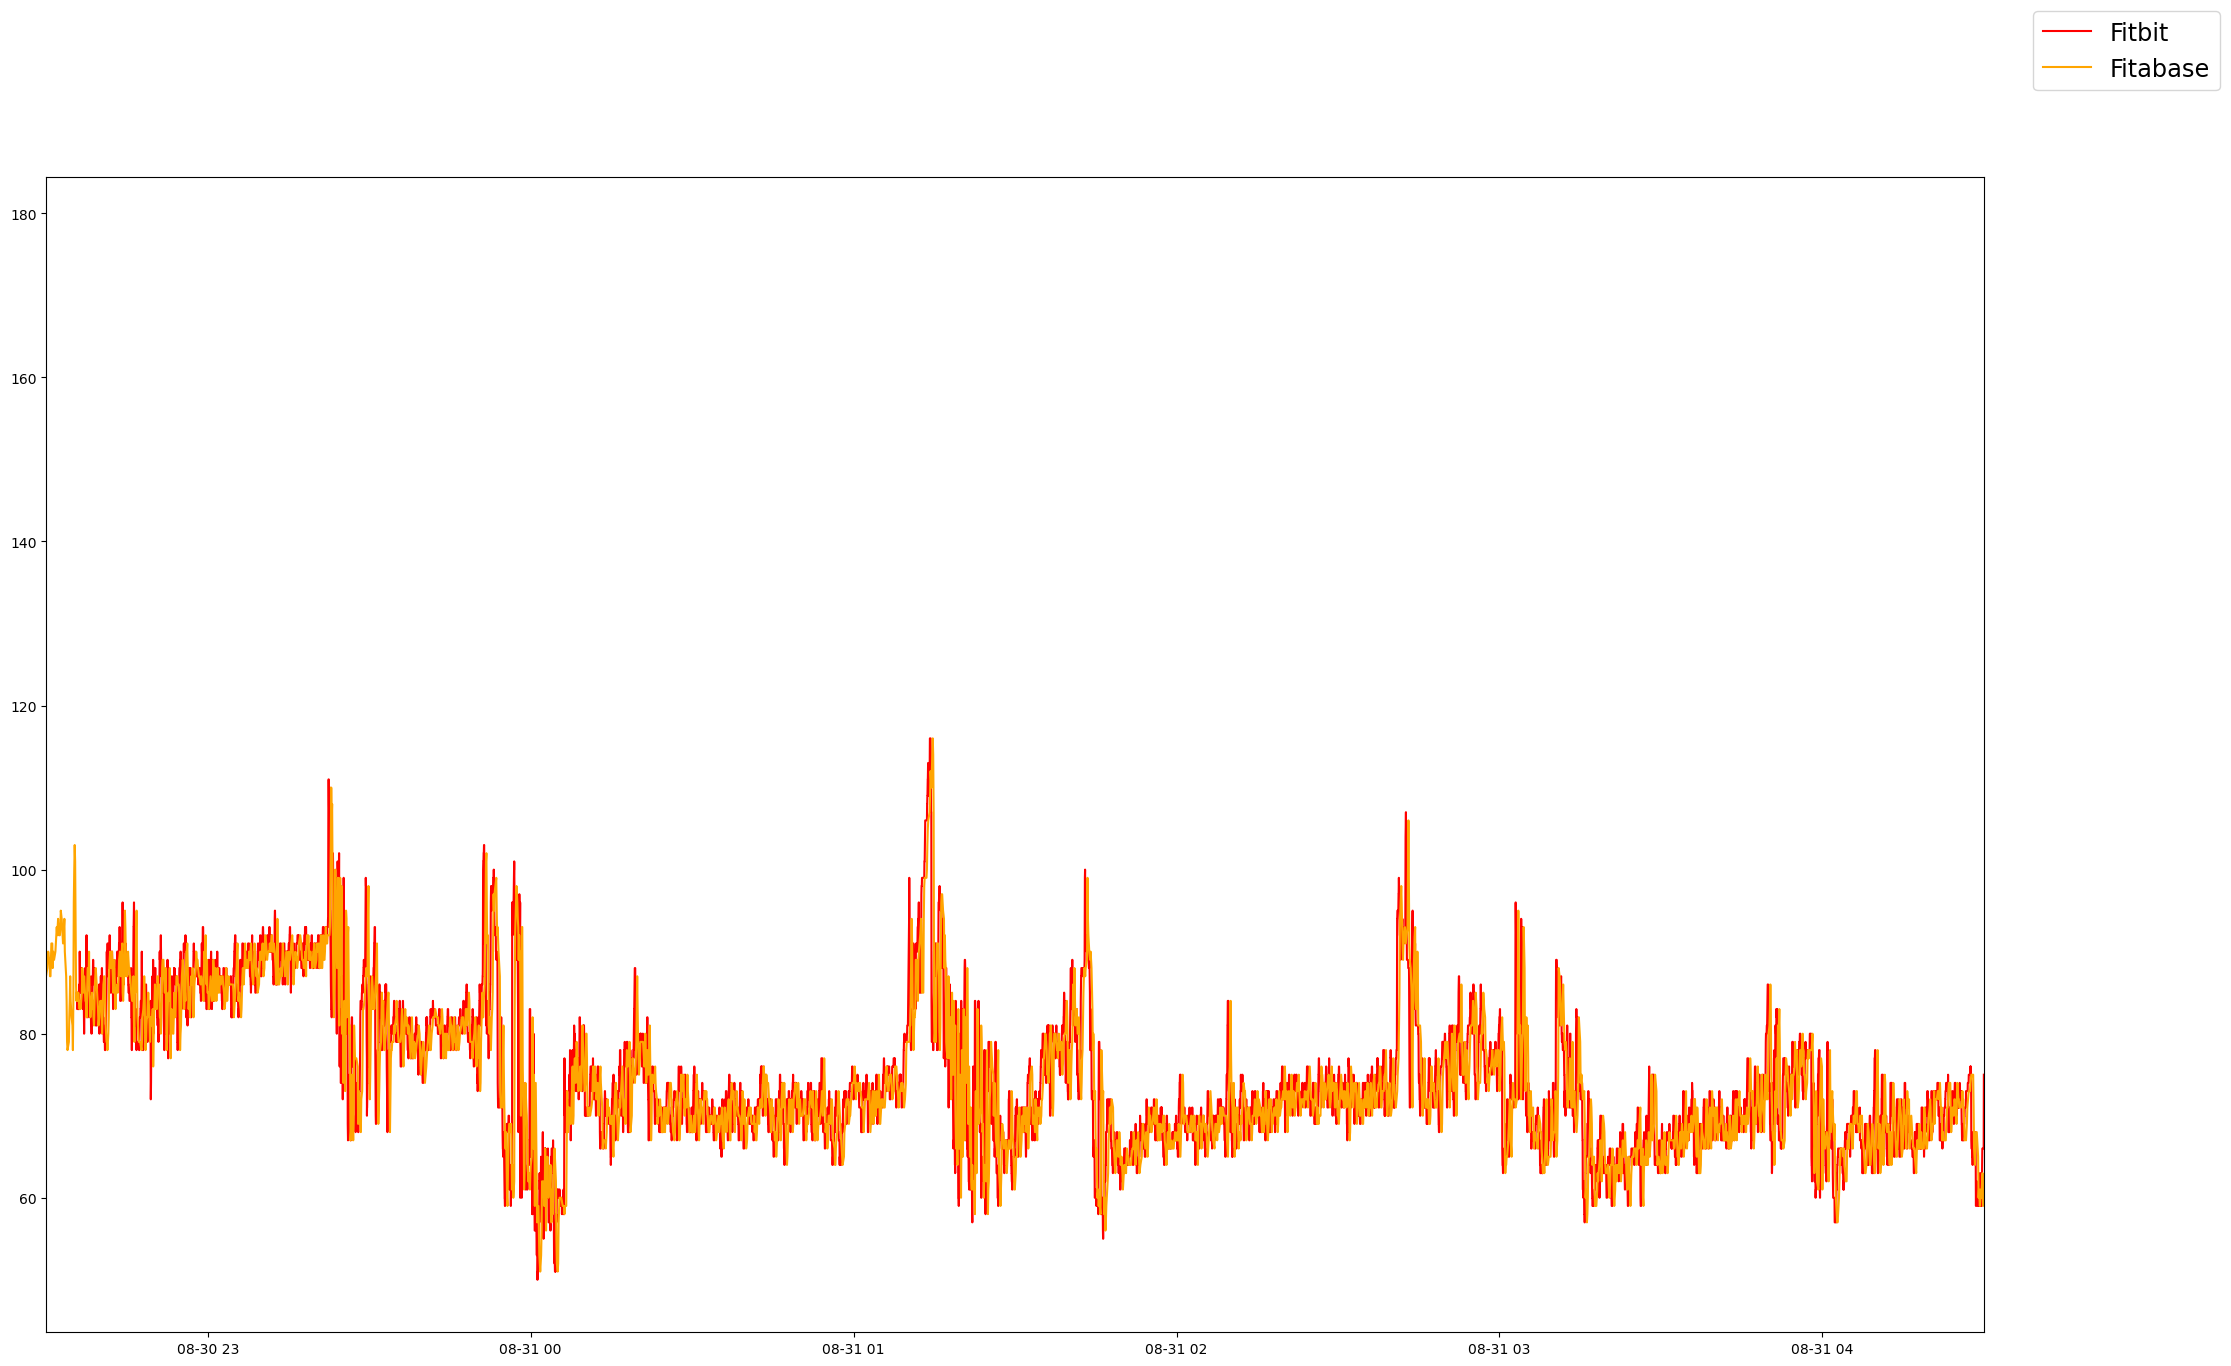

In [6]:


df1=slog_hr.loc[(slog_hr['Time'] >= start) & (slog_hr['Time'] < end), :].reset_index(drop=True)

df1['Time']=df1['Time'].apply(lambda x: x + timedelta(hours=0,minutes=5.6))

#frames=[df1,df2]
#df3=pd.concat(frames)
fig, ax = plt.subplots(figsize=[25,15])
#df1=df1['Time'].apply(lambda x: x + timedelta(hours=2,minutes=40))
ax.plot(df1['Time'], df1['Heart Rate'], label='Fitbit', color='red')
ax.plot(fitabase['Time'], fitabase['Value'], label='Fitabase', color='orange')
ax.set(xlim=[start, end])
#ax.set(xlim=[start, start + timedelta(hours=2)])
fig.legend(fontsize='xx-large')
plt.show()

Fitbit Max Occured: 2023-03-17 02:35:35.676000
Fitabase Max Occured: 2023-03-17 04:45:48


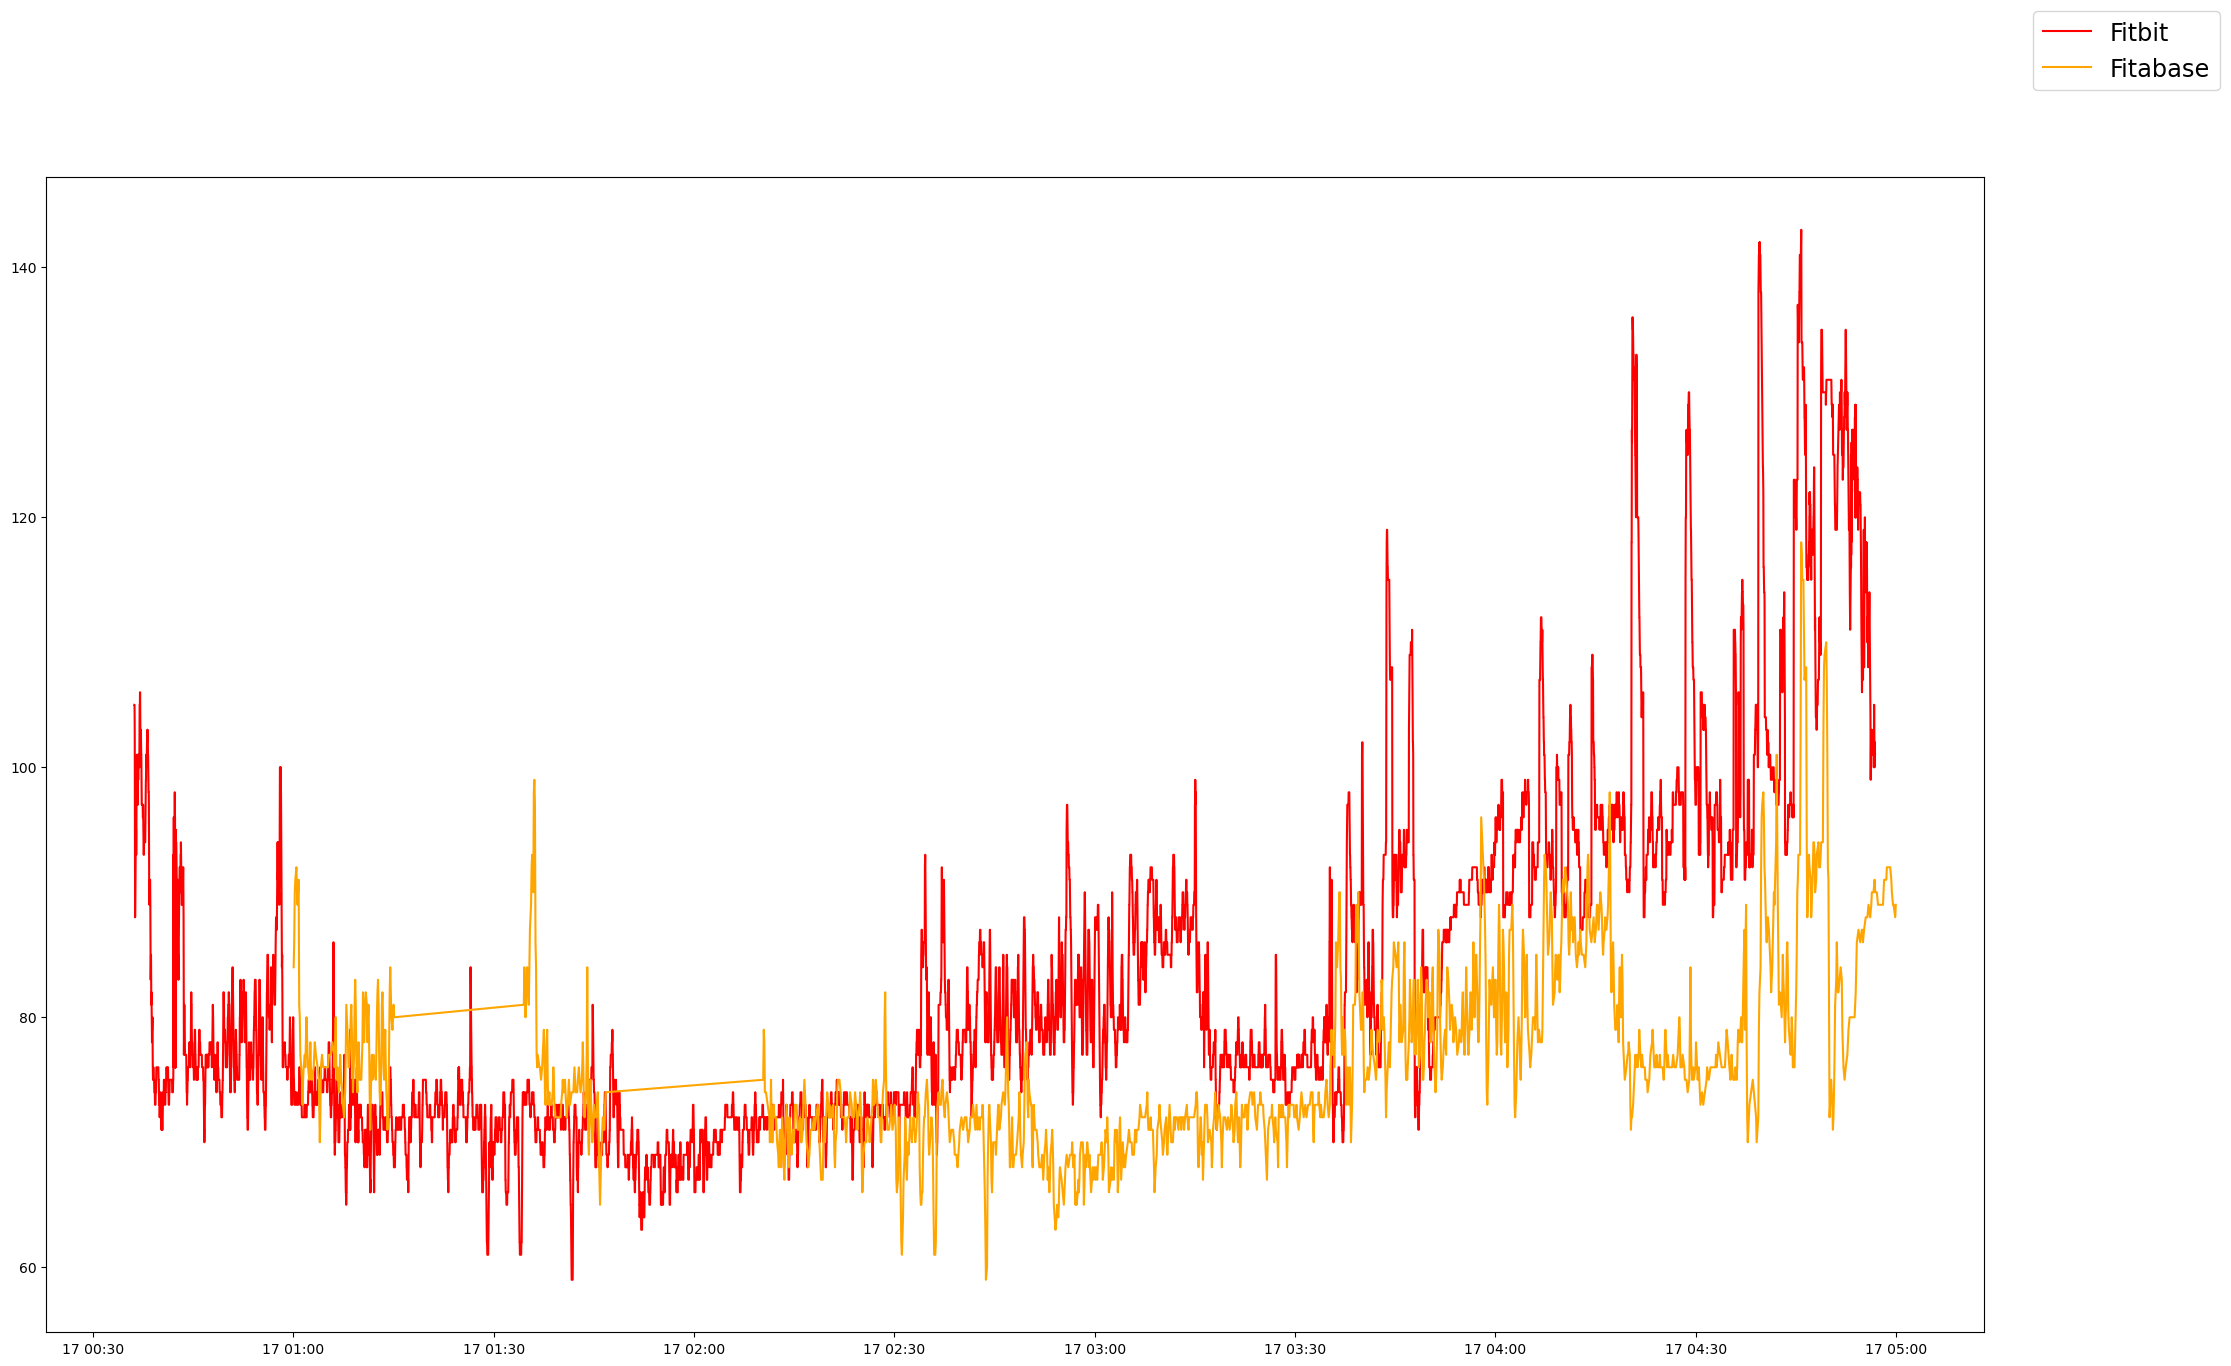

In [80]:
## The code block below attempts to align the fitbit and fitabase using the hr peaks.
# OPTIONAL
# Align FITBIT with FITABASE
# First check when Max's occure
slog_max = df1.iloc[df1['Heart Rate'].idxmax(), 0]
fitabase_max = df2.iloc[df2['Value'].idxmax(), 0]
print(f"Fitbit Max Occured: {slog_max}\nFitabase Max Occured: {fitabase_max}")

# Shift data
if fitabase_max > slog_max :
    shift = fitabase_max - slog_max
    df1['Time'] = df1['Time'].apply(lambda x: x + shift)
else :
    shift = slog_max - fitabase_max
    df2['Time'] = df2['Time'].apply(lambda x: x - shift)

# Plot HR to check initial alignment
fig, ax = plt.subplots(figsize=[25,15])
ax.plot(df1['Time'], df1['Heart Rate'], label='Fitbit', color='red')
ax.plot(df2['Time'], df2['Value'], label='Fitabase', color='orange')
#ax.set(xlim=[start, end])
#ax.set(xlim=[start, start + timedelta(hours=2)])
fig.legend(fontsize='xx-large')
plt.show()

## The code block below attempts to align the fitbit and fitabase using the hr peaks.
<p>This doesn't always work. If it doesn't work you will then need to run the next code block. If it does work, skip to the very last code block</p>

Fitbit Max Occured: 2023-03-17 02:47:35.676000
Fitabase Max Occured: 2023-03-17 08:16:58


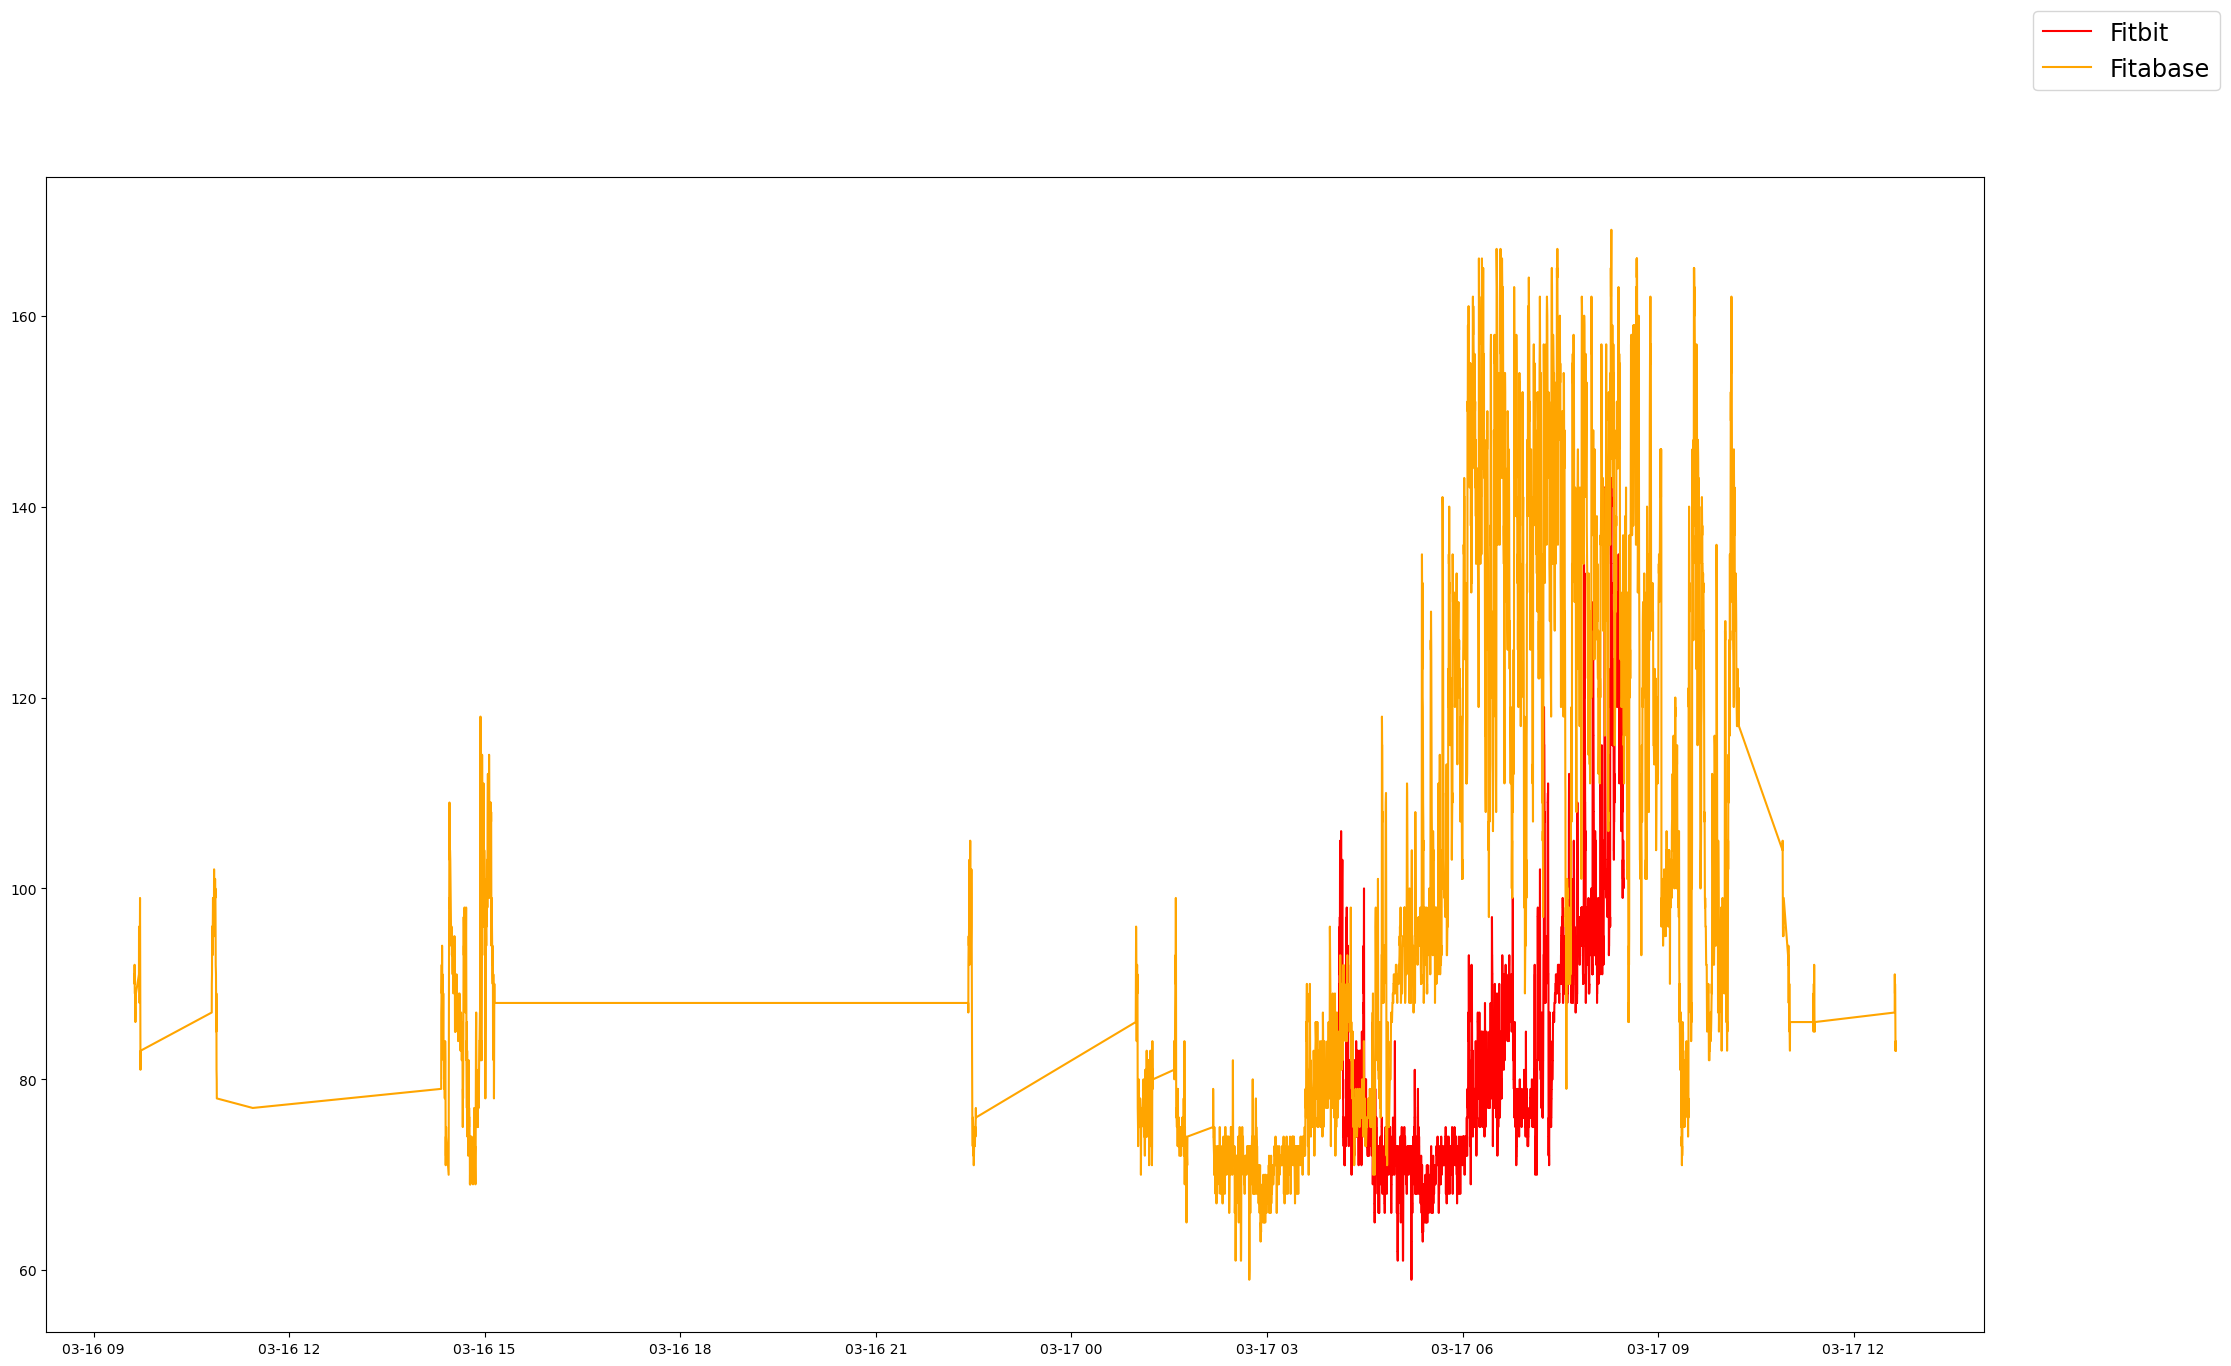

In [5]:
## The code block below attempts to align the fitbit and fitabase using the hr peaks.
# OPTIONAL
# Align FITBIT with FITABASE
# First check when Max's occure
slog_max = slog_hr.iloc[slog_hr['Heart Rate'].idxmax(), 0]
fitabase_max = fitabase.iloc[fitabase['Value'].idxmax(), 0]
print(f"Fitbit Max Occured: {slog_max}\nFitabase Max Occured: {fitabase_max}")

# Shift data
if fitabase_max > slog_max :
    shift = fitabase_max - slog_max
    slog_hr['Time'] = slog_hr['Time'].apply(lambda x: x + shift)
else :
    shift = slog_max - fitabase_max
    slog_hr['Time'] = slog_hr['Time'].apply(lambda x: x - shift)

# Plot HR to check initial alignment
fig, ax = plt.subplots(figsize=[25,15])
ax.plot(slog_hr['Time'], slog_hr['Heart Rate'], label='Fitbit', color='red')
ax.plot(fitabase['Time'], fitabase['Value'], label='Fitabase', color='orange')
#ax.set(xlim=[start, end])
#ax.set(xlim=[start, start + timedelta(hours=2)])
fig.legend(fontsize='xx-large')
plt.show()

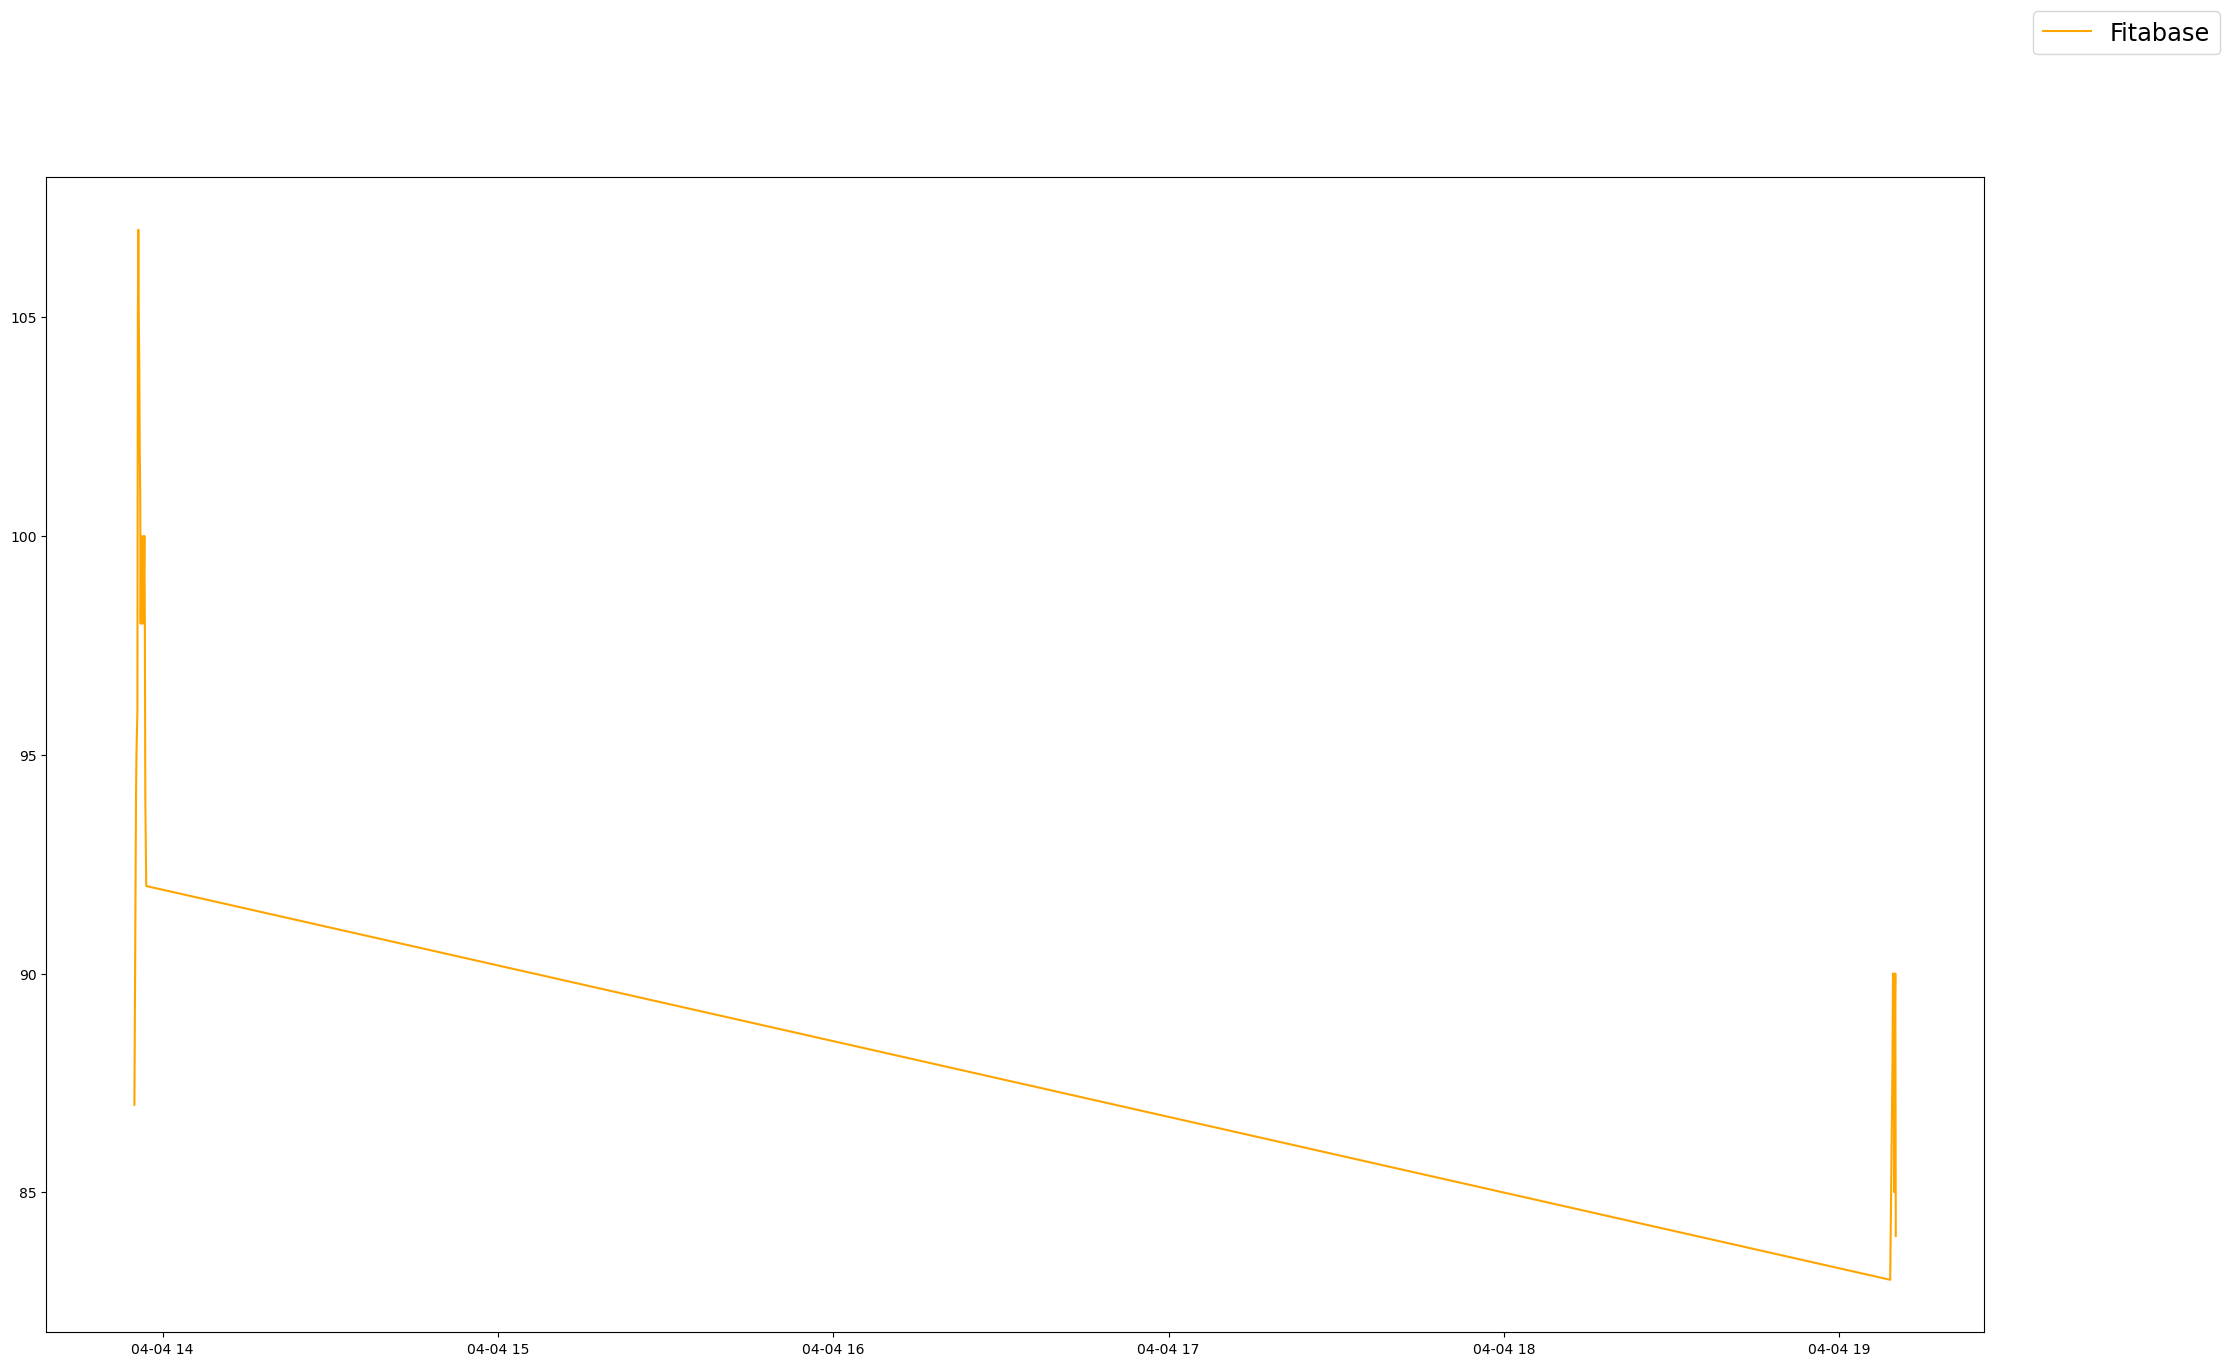

In [23]:
df1=fitabase.loc[(fitabase["Time"] >=start+timedelta(hours=16)) & (fitabase["Time"] <=start+timedelta(hours=24)), ["Time","Value"]]
# Plot HR to check initial alignment
fig, ax = plt.subplots(figsize=[25,15])
ax.plot(df1['Time'], df1['Value'], label='Fitabase', color='orange')
fig.legend(fontsize='xx-large')
plt.show()

## IF the above block did not align the fitbit and the fitabase, try the block below.
<p>You will once again need to change the first line of code. The first line of code is adding (or subtracting) some time to all the times in the fitbit time column. You can adjust whether your adding or subracting and how much time your adding/subtracting</p>

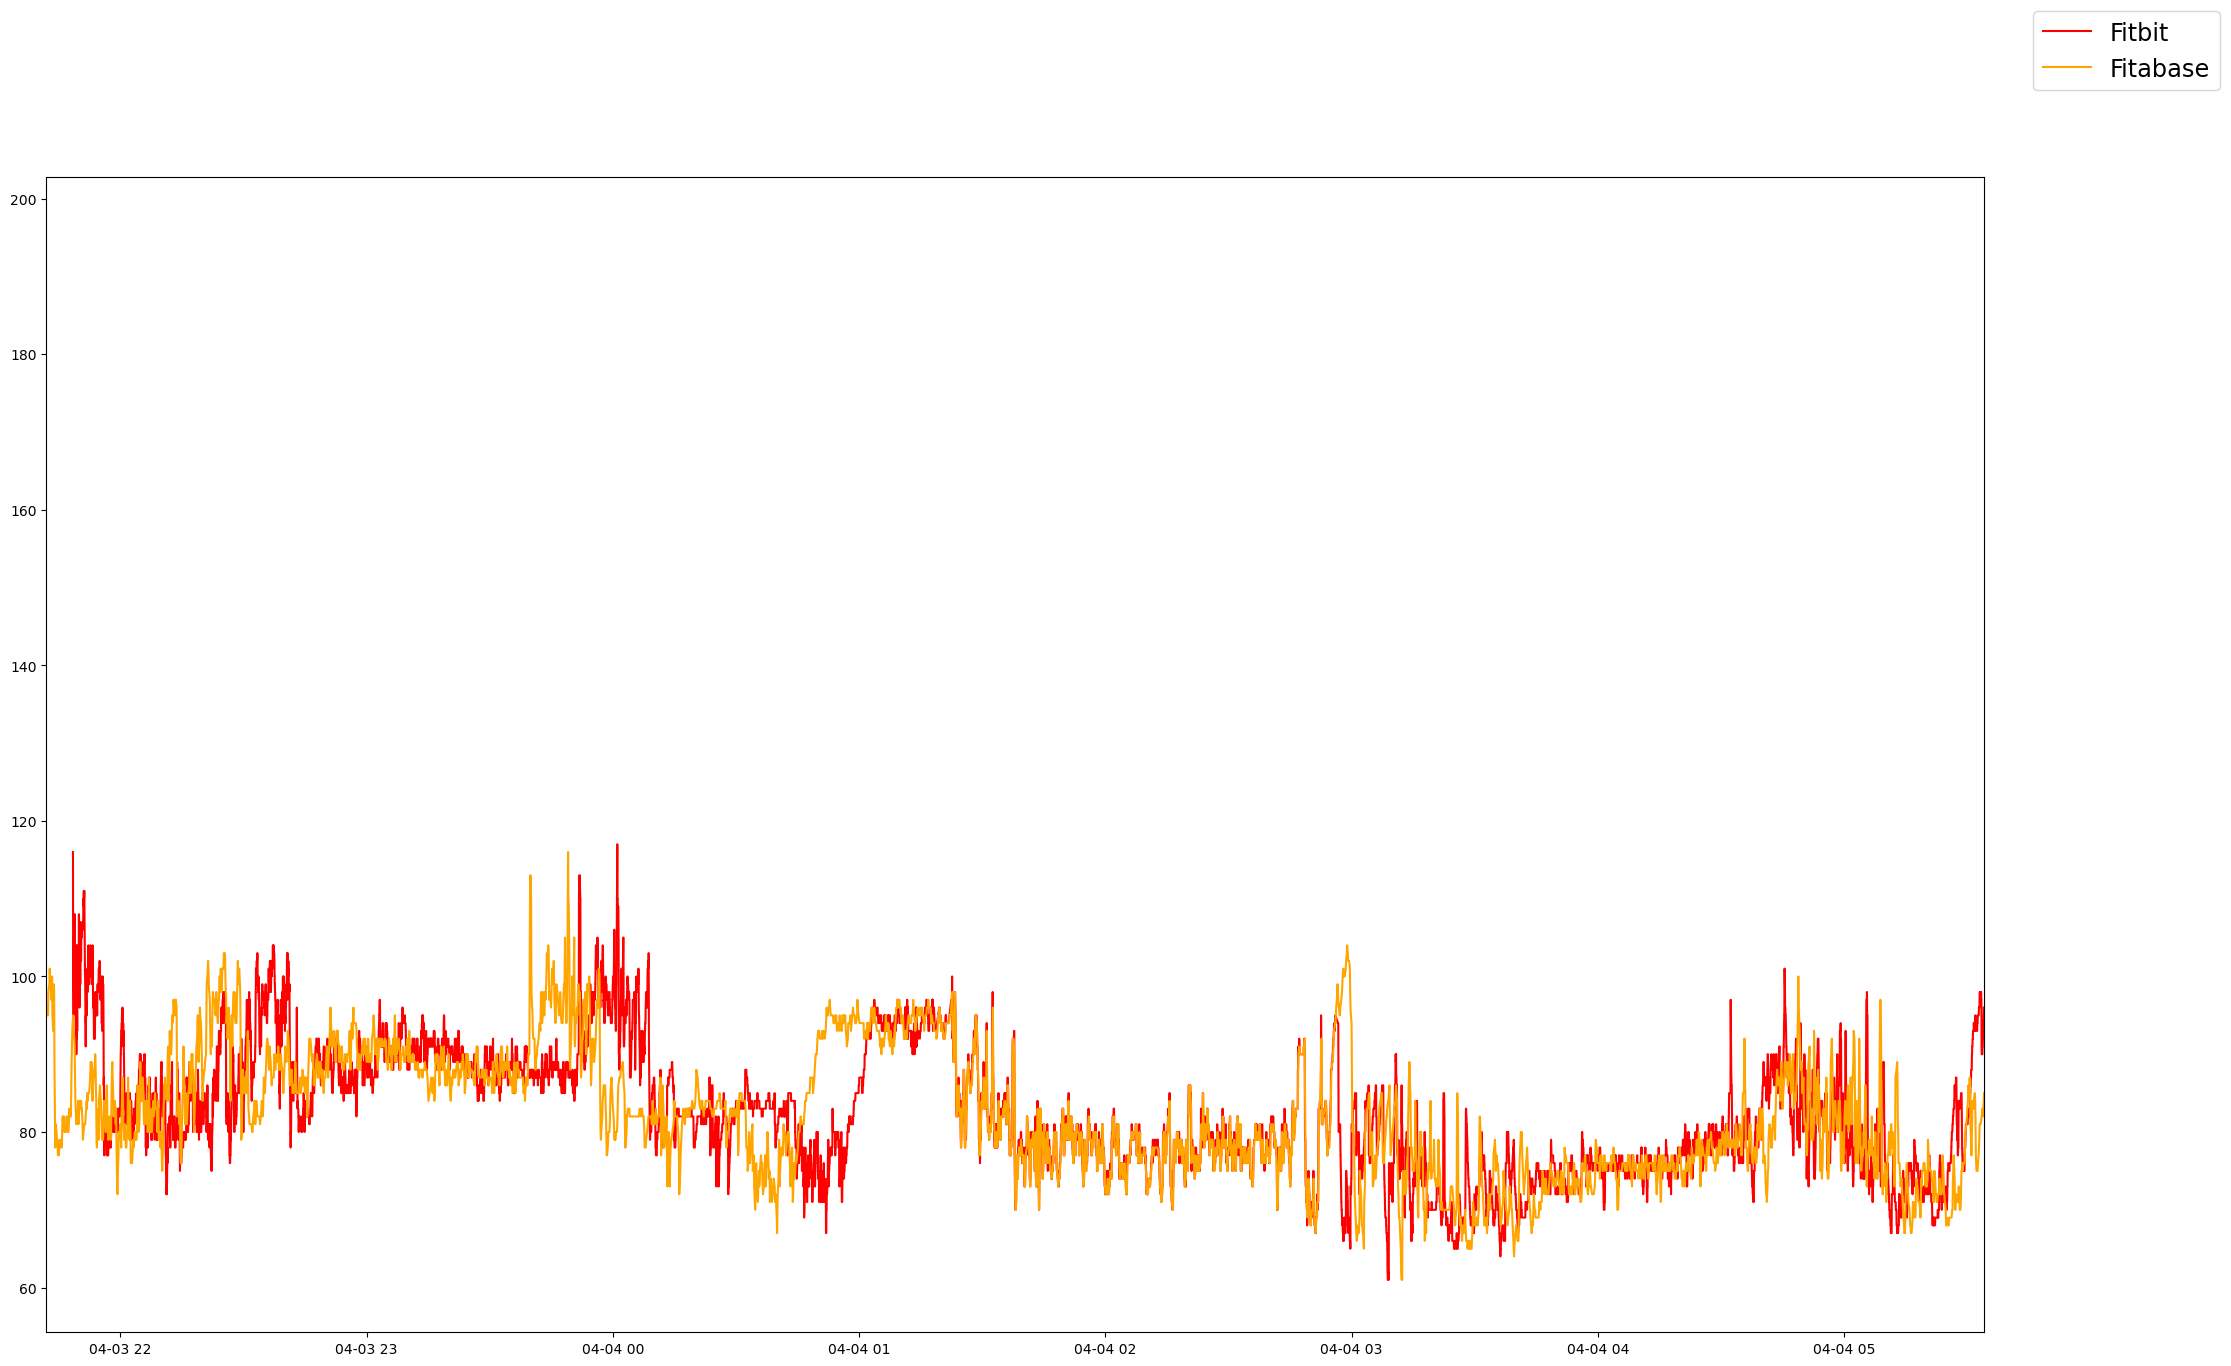

In [50]:


# Plot to check alignment
fig, ax = plt.subplots(figsize=[25,15])
ax.plot(slog_hr['Time'], slog_hr['Heart Rate'], label='Fitbit', color='red')
ax.plot(fitabase['Time'], fitabase['Value'], label='Fitabase', color='orange')
ax.set(xlim=[start, end])
#ax.set(xlim=[start + timedelta(hours=2), start + timedelta(hours=4)])
fig.legend(fontsize='xx-large')
plt.show()

## Run the last line of code to save the changes you've made to the fitbit heartrate file

In [8]:
# Write FITBIT data to CSV
df1.to_csv(path + "Fitbit\\" + part_id+ "_heart.csv", index=None)